## Zigzag Shopping Mall Data Analysis



<img src ="https://i.imgur.com/9zb1Cdh.jpg" width=700>

---

## *set options

In [2]:
import pandas as pd

In [3]:
# Set opitions
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

In [4]:
# python
# sqlite 
import pandas as pd
import sqlite3

In [5]:
#Write your code here!
connect = sqlite3.connect("zigzag_DB.db")
query = "Select * From 'order'"
order =pd.read_sql(query, connect)
print(order.shape)
order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [18]:
# check schema of the db
query = "SELECT * FROM sqlite_master"

schema = pd.read_sql(query, connect)

for i in schema['sql']:
    print(i)

CREATE TABLE "order" (
"timestamp" TEXT,
  "user_id" TEXT,
  "goods_id" INTEGER,
  "shop_id" INTEGER,
  "price" INTEGER
)
CREATE TABLE "good" (
"goods_id" INTEGER,
  "timestamp" TEXT,
  "shop_id" INTEGER,
  "category" TEXT,
  "price" INTEGER,
  "image_type" TEXT,
  "image_width" INTEGER,
  "image_height" INTEGER
)
CREATE TABLE "shop" (
"shop_id" INTEGER,
  "name" TEXT,
  "category" TEXT,
  "age" TEXT,
  "style" TEXT
)
CREATE TABLE "log" (
"timestamp" TEXT,
  "user_id" TEXT,
  "event_origin" TEXT,
  "event_name" TEXT,
  "event_goods_id" REAL,
  "event_shop_id" REAL
)
CREATE TABLE "user" (
"user_id" TEXT,
  "os" TEXT,
  "age" INTEGER
)


**<b> Order table: Top 10 shop_id**

In [6]:
#Write your code here!
table = pd.pivot_table(order, index="shop_id", values = 'price', aggfunc ="sum")

table.sort_values(by="price", ascending = False).head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


## <b> Top 10 Graph

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#Write your code here!

table = pd.pivot_table(order, index="shop_id", values = 'price', aggfunc =["sum", 'count'])
table.columns = ['sum', 'count']
table = table.sort_values(by = 'sum', ascending = False)
top10_table = table.head(10)

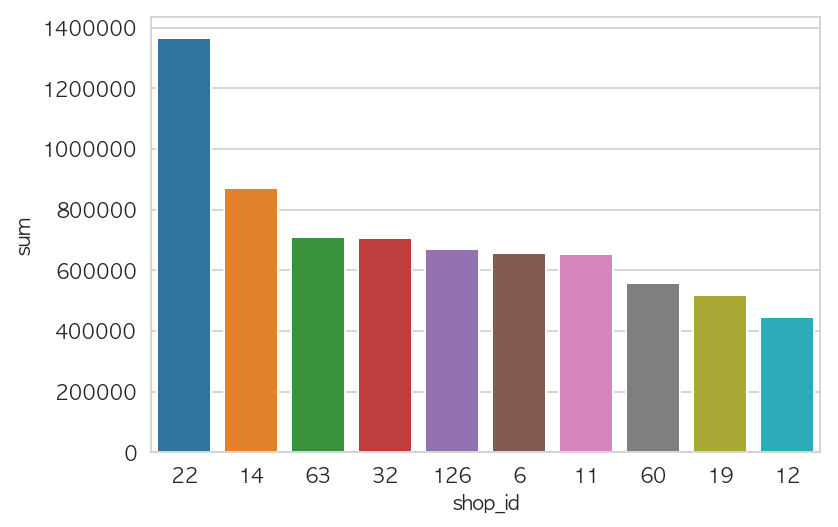

In [22]:
sns.barplot(data=top_table, x=top10_table.index, y="sum", order=top_table.index)

## <b> lineplot for 06/11 data 

지그재그 이용자들의 구매 패턴을 알아보려고 합니다. timestamp를 to_datetime을 이용하여 datetime 자료형으로 만든 뒤, 이를 이용하여 시간대별 총 매출량을 구해주세요.

x를 timestamp, y를 price로 놓는 경우 다음과 같은 그래프가 나오게 됩니다. 

![](https://i.imgur.com/5cqEAAj.png)

In [10]:
import matplotlib as mpl

sns.set_style('whitegrid') 

mpl.rc('font', family='AppleGothic') # Mac: AppleGothic, Korean 
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


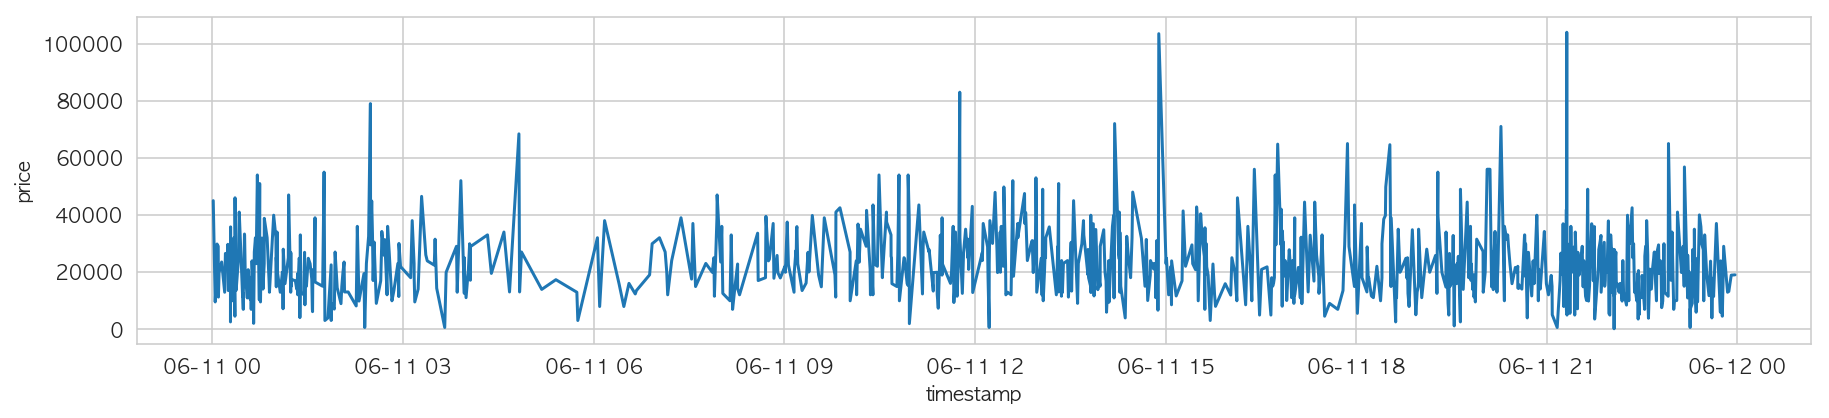

In [11]:
#Write your code here!
order.timestamp = pd.to_datetime(order.timestamp)
import matplotlib.pyplot as plt
plt.figure(figsize =(15,3))
sns.lineplot(data=order, x='timestamp', y='price')

##  <b> Plot by Hourly 

In [12]:
order['hour'] = order.timestamp.dt.hour

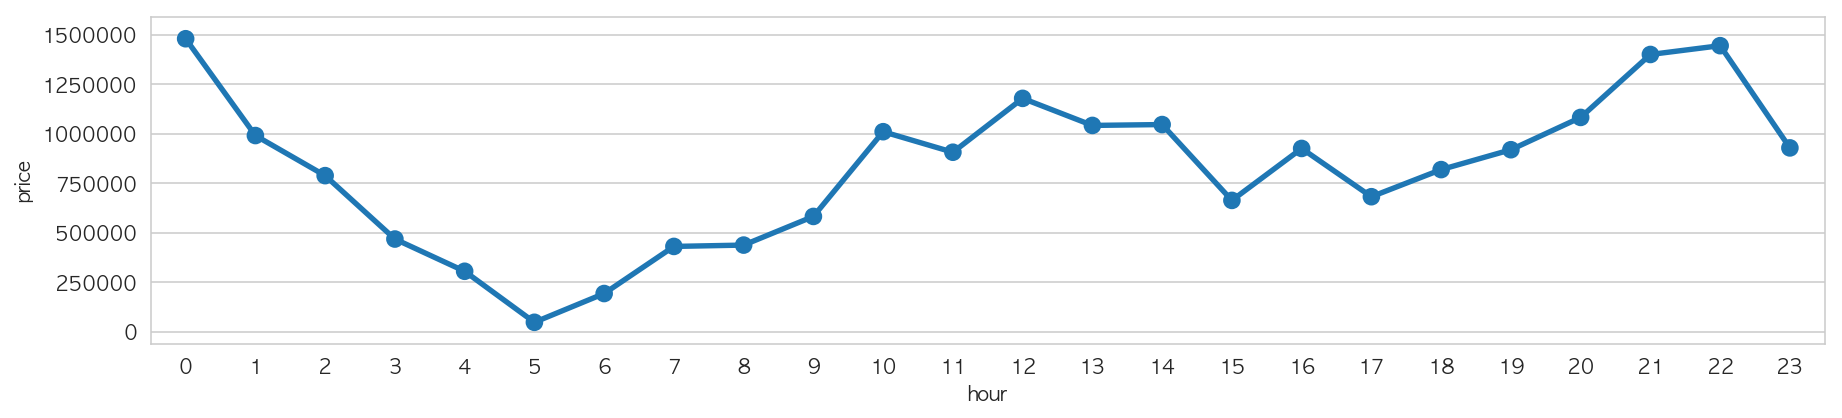

In [13]:
plt.figure(figsize =(15,3))
data=pd.pivot_table(data=order, index='hour', values='price', aggfunc='sum').reset_index()
sns.pointplot(data=data, x="hour", y='price')
plt.savefig('hour_image.png') # save the image

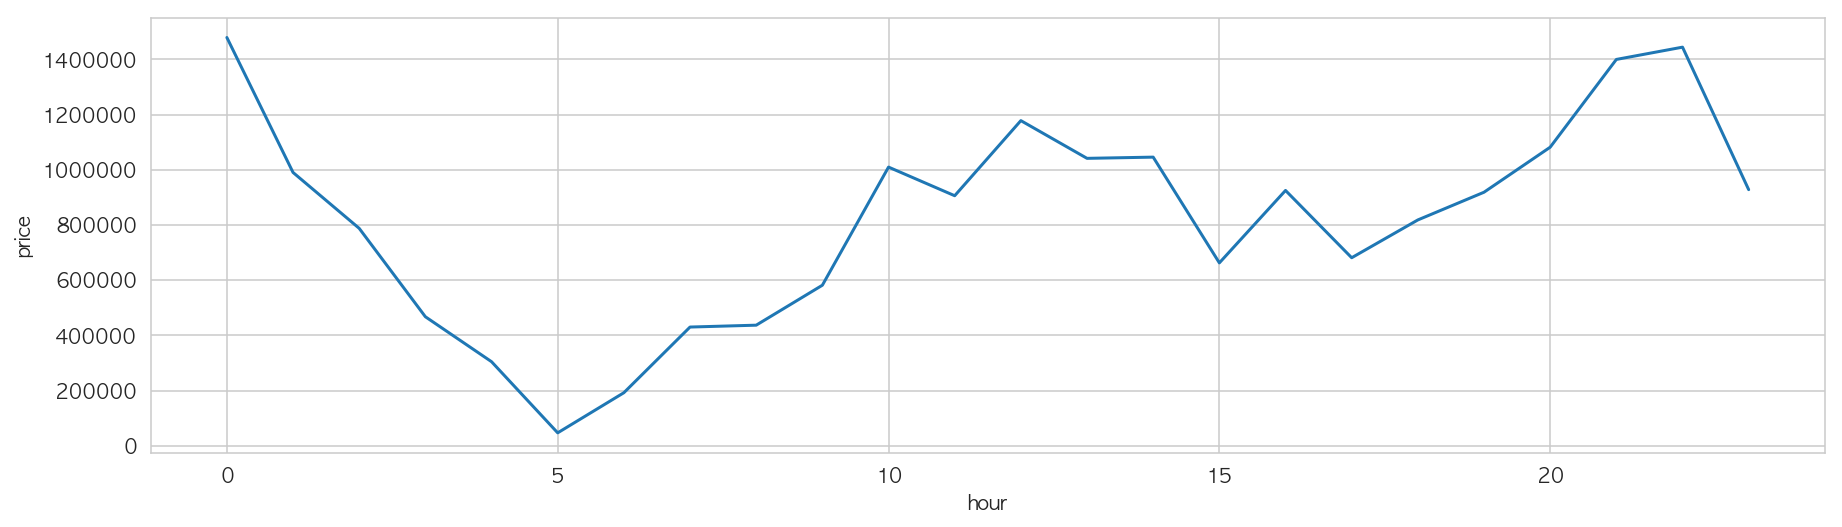

In [15]:
# data.index for x instead of reset_index()
plt.figure(figsize=[15,4])
data=pd.pivot_table(data=order, index='hour', values='price', aggfunc='sum')
sns.lineplot(data=data, x=data.index, y='price')


In [16]:
#Write your code here!
query = "Select * From 'user'"
user =pd.read_sql(query, connect)
user.head()

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [19]:
order_user = order.merge(user, on = "user_id") # default how = 'inner'
print(order_user.shape)
order_user.head()

(867, 8)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


## <b> Top 10 by age

![](https://i.imgur.com/roHlnXi.png)

In [27]:
#Write your code here!
df = order_user[order_user['age'] != -1]

In [28]:
# top 10 sales 
top10 = pd.pivot_table(data=df, index='shop_id', values='price', aggfunc='sum').reset_index().sort_values(by='price', ascending=False).head(10)
top10 = top10['shop_id'].unique()

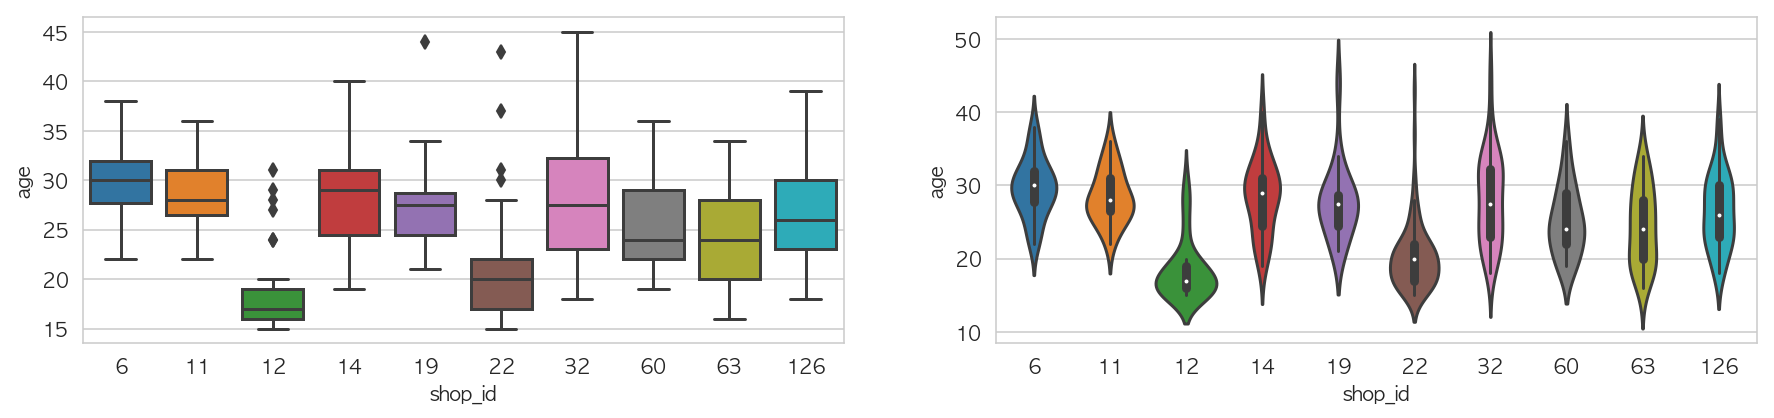

In [30]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,3)
sns.boxplot(data=df.loc[df['shop_id'].isin(top10), ['shop_id', 'age']],x='shop_id', y='age', ax=ax1)
sns.violinplot(data=df.loc[df['shop_id'].isin(top10), ['shop_id', 'age']],x='shop_id', y='age', ax=ax2)
figure.savefig('top10_age.png', dpi=400)

In [25]:
# utilize top10_table above 
order_user_top10 = order_user[(order_user['shop_id'].isin(top10_table.index)) & (order_user['age'] != -1)]

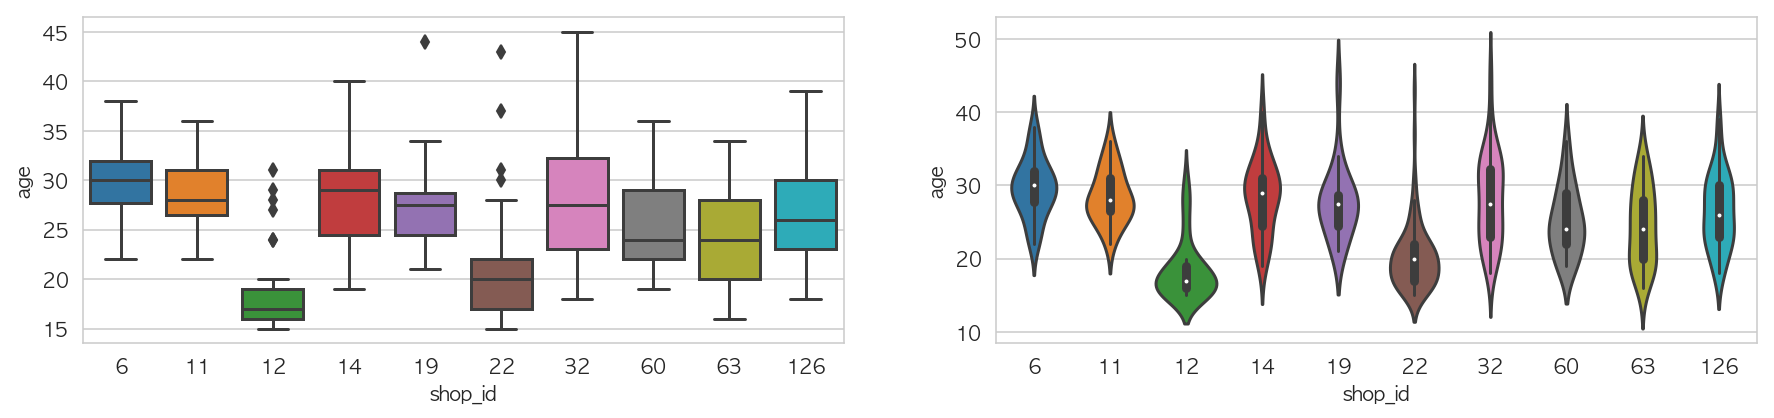

In [31]:
# same result !! 
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches([15,3])

sns.boxplot(data = order_user_top10, x='shop_id', y='age', ax=ax1)
sns.violinplot(data = order_user_top10, x='shop_id', y='age', ax=ax2)


In [610]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"


10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [611]:
#Write your code here!
df = order_user.copy()
df['연령대'] = df['age'].apply(make_generation)
df.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1,미입력
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34,30대 중반
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17,10대


In [612]:
#Write your code here!
query = "Select * From 'shop'"
shop =pd.read_sql(query, connect)
shop.head(3)

,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직


In [616]:
order_user_shop = df.merge(shop, on='shop_id', how = 'inner') # default how = inner 

order_user_shop.shape

(867, 13)

In [617]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [619]:
#Write your code here!
order_user_shop['거래연령 일치여부'] = order_user_shop.apply(check_generation, axis="columns")
pd.pivot_table(data=order_user_shop, 
               index='shop_id', 
               values='거래연령 일치여부', 
               aggfunc=['mean','count']).head()


,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


In [ ]:
#same result 
order_user_shope.pivot_table(values='거래연령 일치여부',
                                                    index='shop_id',
                                                    aggfunc=['mean', 'count'])

## <b> Style tag list

In [620]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [621]:
#Write your code here!
shop_copy = shop.copy()

In [622]:
# NA => None for slicing str
shop_copy.loc[shop_copy['style'].isnull(), 'style'] = "None"

In [623]:
# Generate all style_list columns 
# Check all style columns !!
# str.contains return boolean !! 

for style in style_list:
    shop[f"{style}"] = shop['style'].str.contains(style)

"""for name in style_list:
    shop_copy[f"{name}"] = False
    shop_copy.loc[shop_copy['style'].str.contains(f"{name}"), f"{name}"] = True
"""

In [626]:
#shop_copy=shop_copy.set_index('shop_id')
shop_copy.head(2)

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## <b> graph style keword by purchase


In [627]:
merged = (
    order.merge(shop_copy, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(3)

(867, 31)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37


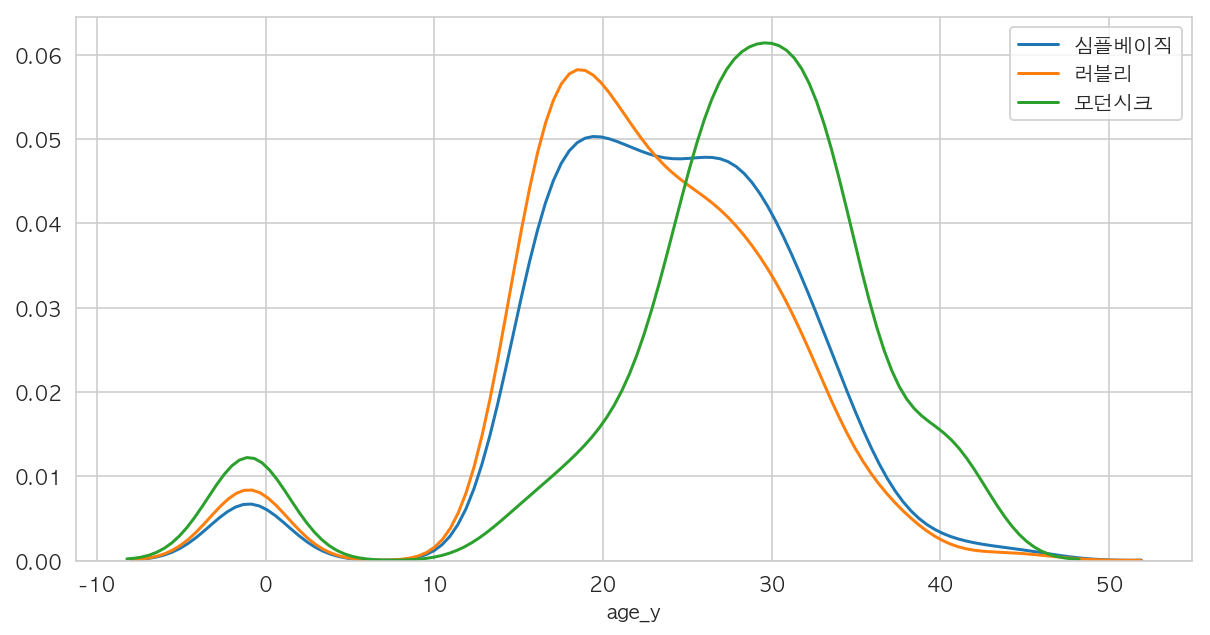

In [628]:
#Write your code here!
simple = merged[merged['심플베이직'] == True]
lovely = merged[merged['러블리'] == True]
modern = merged[merged['모던시크'] == True]
plt.figure(figsize=(10,5))
sns.distplot(simple['age_y'], hist=False, label = '심플베이직')
sns.distplot(lovely['age_y'], hist=False, label = '러블리')
sns.distplot(modern['age_y'], hist=False, label = '모던시크')
plt.savefig('dist.png', dpi=400)

In [629]:
#Write your code here!
query = "select * from log"
data_logs = pd.read_sql(query, connect)
data_logs['timestamp'] = pd.to_datetime(data_logs['timestamp'])
print(data_logs.shape)
data_logs.head()

지그재그 로그 데이터의 명세는 다음과 같습니다.


    - 컬럼 별 명세
        1. timestamp : 이벤트 발생 시간 (한국 시간 기준)
        2. user_id : 이용자 고유 식별자
        3. event_origin : 이벤트가 발생한 앱 위치
            - event_origin 값 별 의미
                a. goods_search_result : 특정 검색어의 상품 검색 결과
                    (Ex: goods_search_result/반팔티)
                b. shops_ranking : '쇼핑몰 랭킹' 영역
                c. shops_bookmark : '즐겨찾기' 영역
                d. category_search_result : 카테고리 검색 결과 
                    (Ex:category_search_result/상의)
                e. my_goods : '내 상품' 영역
                
        4. event_name : 발생한 이벤트 명
            - event_name 값 별 의미
                a. app_page_view : 앱 내 화면 이동
                b. enter_browser : 앱 내 클릭을 통해, 특정 웹페이지로 진입
                c. add_bookmark : 특정 쇼핑몰을 즐겨찾기 추가
                d. remove_bookmark : 특정 쇼핑몰을 즐겨찾기 제거
                e. add_my_goods : 특정 상품을 내 상품 추가
                f. remove_my_goods : 특정 상품을 내 상품 제거
                
        5. event_goods_id : 이벤트가 발생한 상품 고유 식별자
             - 상품 관련 이벤트가 아닌 경우, 공백
             
        6. event_shop_id : 이벤트가 발생한 쇼핑몰 고유 식별자
             - 쇼핑몰 관련 이벤트가 아닌 경우, 공백



In [638]:
# user_id array from user table 
user_id =user['user_id'].unique()

In [639]:
#새로운 user_id는 연속된 자연수들로 지정합니다. range()와 len()을 사용하여 user_id의 개수만큼의 연속된 정수를 만듭니다.
# Write your code here!
n_user_id = range(user['user_id'].size)

# same result     
"""n_user_id = []
for i in range(len(user_id)):
    n_user_id.append(i)
"""

In [640]:
#python 내장 함수인 zip()을 이용하여 기존의 id와 새로운 id를 묶습니다.
id_zip = zip(user_id, n_user_id)

#id_zip을 출력하면 아래 결과와 같이 zip object이 출력됩니다.
print(id_zip)

In [641]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환하여 print하겠습니다. 상위 5개만 출력합니다.
list(zip(user_id, n_user_id))[:5]


[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [645]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성합니다.
id_dict = dict(id_zip)
#id_dict

In [643]:
# data_logs, order, user에 id_idct를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만듭니다.

# Write your code here! (3 lines)

data_logs['n_user_id'] = data_logs['user_id'].map(id_dict)
order["n_user_id"] = order['user_id'].map(id_dict)
user["n_user_id"] = user['user_id'].map(id_dict)

# 결과를 확인합니다.
data_logs[['user_id', 'n_user_id']].head(5)

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7844
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7920
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5608


## <b> concat

In [646]:
#주문 데이터의 첫번째 row를 출력합니다.
order.iloc[0]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
Name: 0, dtype: object

In [305]:
data_logs[data_logs['user_id'] == order.iloc[0][1]]

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6241
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6241
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6241
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6241


In [647]:
# set()을 사용하여 user_id컬럼을 집합 타입으로 변환후 원소 개수를 반환하여 변수에 저장해주세요.

# 주문한 고객의 수를 user_number_order란 변수에 저장해주세요.

user_number_order = len(set(order['user_id']))

# log에 기록된 고객의 수를 user_number_log란 변수에 저장해주세요.

user_number_log = len(set(data_logs['user_id']))


# 중복된 고객들을 user_duplicated란 변수에 저장해주세요.

user_duplicated = set(order['user_id']) & set(data_logs['user_id'])


# 결과를 출력합니다.
print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


In [310]:
print(order.columns)
print(data_logs.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour'], dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


In [648]:
# order 원본을 변형하지 않기 위해 order을 copy하여 사용합니다. 
order_copy = order.copy()
order_copy.shape

(867, 6)

In [651]:
# 겹치는 유저만으로 data를 indexing합니다. user_duplicated 이용합니다. 
# isin을 이용한 indexing은 뒤의 문제에서도 많이 나오기 때문에 유심히 봐두시면 유용합니다.
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]

#  event_origin 컬럼에는 shop_id 컬럼을 저장합니다.
order_copy['event_origin'] = order_copy['shop_id']

#  event_name 컬럼에는 'purchase'를 저장합니다.
order_copy['event_name'] = 'purchase'

# event_goods_id 컬럼에는 good_id 컬럼를 저장합니다.
order_copy['event_goods_id'] = order_copy['goods_id']

# 사용할 columns를 설정합니다.
order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

order_copy.head()


,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,6241,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,8899,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,7832,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,2745,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,7800,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [652]:
# data_logs, order_copy를 concat 해주하여 다시 log_order에 저장해주세요.
log_order = pd.concat([data_logs, order_copy], sort = False) # sort = False ?

# Write your code here!

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


----

In [654]:
# Write your code here!
# if data has price, purchase must be true.
"""log_order['purchase'] = False
log_order.loc[log_order['price'].notnull(), 'purchase'] = True
"""
# 
log_order['purchase'] = log_order["price"].notnull()
log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_ranking,NaN,3314,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
1,NaN,app_page_view,shops_bookmark,NaN,7844,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,False
2,NaN,app_page_view,goods_search_result/로브,NaN,7920,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,False
3,NaN,app_page_view,shops_bookmark,NaN,3314,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
4,NaN,app_page_view,shops_bookmark,NaN,5608,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,False


----

In [656]:
log_order = log_order.sort_values(by = ['user_id', 'timestamp']).reset_index(drop =True)

log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


In [439]:
log_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106587 entries, 0 to 106586
Data columns (total 11 columns):
event_goods_id     19293 non-null float64
event_name         106587 non-null object
event_origin       106587 non-null object
event_shop_id      21644 non-null float64
n_user_id          106587 non-null int64
price              772 non-null float64
timestamp          106587 non-null datetime64[ns]
user_id            106587 non-null object
purchase           106587 non-null bool
timestamp_after    96678 non-null datetime64[ns]
log_duration       106587 non-null object
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 8.2+ MB


## <b> Page or Log Duration

In [657]:
# 우선, timestamp 컬럼를 datetime 타입으로 변환해주세요.
log_order['timestamp']= pd.to_datetime(log_order['timestamp'])
log_order.info()
# Write your code here!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106587 entries, 0 to 106586
Data columns (total 9 columns):
event_goods_id    19293 non-null float64
event_name        106587 non-null object
event_origin      106587 non-null object
event_shop_id     21644 non-null float64
n_user_id         106587 non-null int64
price             772 non-null float64
timestamp         106587 non-null datetime64[ns]
user_id           106587 non-null object
purchase          106587 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.6+ MB


In [658]:
# timestamp_after 컬럼을 다음과 같이 만듭니다.
# shift)(-1) => each data moves backward 1 unit
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)
log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 00:55:44.430
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:00:33.295
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:11:03.608


In [659]:
# log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장합니다.
import datetime
"""log_order['log_duration'] = log_order['timestamp_after'] - log_order['timestamp']
# keep same data type: timedelta 
log_order.loc[log_order['log_duration'].isnull(), "log_duration"] = pd.to_datetime(0) - pd.to_datetime(0)"""

log_order['page_duration'] = (log_order['timestamp_after'] - log_order['timestamp']).fillna(0)

log_order[['timestamp','timestamp_after','page_duration']].head()

,timestamp,timestamp_after,log_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,00:00:00
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


In [661]:
# Write your code here!
# covert it into seconds 
"""log_order['page_duration'] = log_order['page_duration']/ np.timedelta64(1, 's')
log_order['page_duration'] = log_order['page_duration'].astype(float)"""

In [ ]:
log_order['page_duration'] = log_order['page_duration'].map(lambda x: x.total_seconds()).astype('float')

In [663]:
log_order[["n_user_id",'timestamp','timestamp_after','page_duration']].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0,2018-06-11 15:59:05.505,NaT,0.000
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


## <b> Remaining Duration

In [523]:
# 40분을 초로 환산해야 합니다.
"""def is_out(row):
    if row['log_duration'] == 0:
        return True
    elif row['log_duration'] >= 40*60:
        return True
    else:
        return False"""
# Write your code here!

In [664]:
# log_order['is_out'] = log_order.apply(is_out, axis=1)

In [ ]:
# same result 
log_order["is_out"] = (log_order["page_duration"] > 2400) | (log_order["page_duration"] == 0 )

In [665]:
log_order[["n_user_id",'timestamp','timestamp_after','page_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


In [669]:
# Write your code here!
"""a =log_order['log_duration'] >= 2400 
b =log_order['log_duration'] < 0
index = a | b

log_order.loc[index, 'log_duration'] = 0.000"""

In [670]:
#log_order.loc[log_order['log_duration'] == 0, 'is_out'] = True

In [671]:
#log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


In [ ]:
log_order.loc[log_order['is_out'], 'page_duration'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out']].head(20)

In [673]:
"""log_order['cycle_idx_unique'] = (log_order['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(5)"""

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1


In [ ]:
log_order['is_out-cumsum()'] = log_order['is_out'].cumsum()
log_order["is_out-cumsum()-shift(1)"] = log_order['is_out-cumsum()'].shift(1)
log_order["is_out-cumsum()-shift(1)-fillna(0)"] = log_order["is_out-cumsum()-shift(1)"].fillna(0)
log_order["is_out-cumsum()-shift(1)-fillna(0)-astype(int)"] = log_order["is_out-cumsum()-shift(1)-fillna(0)"].astype(int)

log_order['session_idx_unique'] = (log_order['is_out']
                                 .cumsum() # 컬럼의 누적 합계를 반환합니다.
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out','is_out','is_out-cumsum()','is_out-cumsum()-shift(1)', 'is_out-cumsum()-shift(1)-fillna(0)','is_out-cumsum()-shift(1)-fillna(0)-astype(int)','session_idx_unique']].head(30)

In [674]:
"""log_order['cycle_idx_daily'] = (log_order.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

# user마다 첫 cycle_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줍니다.
head_index = log_order.groupby('n_user_id')['cycle_idx_daily'].head(1).index
log_order.loc[head_index, 'cycle_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_daily','cycle_idx_unique']].head(30)"""

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_daily,cycle_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,0,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,0,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,0,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,0,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,0,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,0,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,0,1
9,2,2018-06-11 23:19:11.439,2018-06-11 02:21:04.848,0.000,True,0,2


In [ ]:
log_order['is_out-cumsum()'] = log_order.groupby('n_user_id')['is_out'].cumsum()
log_order["is_out-cumsum()-shift(1)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1)
log_order["is_out-cumsum()-shift(1)-fillna(0)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1).fillna(0)
log_order["is_out-cumsum()-shift(1)-fillna(0)-astype(int)"] = log_order.groupby('n_user_id')['is_out'].cumsum().shift(1).fillna(0).astype(int)



log_order['session_idx_daily'] = (log_order.groupby('n_user_id')['is_out']                     
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)                      
                                    )

# user마다 첫 session_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줍니다.
head_index = log_order.groupby('n_user_id')['session_idx_daily'].head(1).index
log_order.loc[head_index, 'session_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'page_duration','is_out','is_out-cumsum()','is_out-cumsum()-shift(1)', 'is_out-cumsum()-shift(1)-fillna(0)','is_out-cumsum()-shift(1)-fillna(0)-astype(int)','session_idx_daily']].head(30)

In [675]:
session_log_count = (log_order
                 .groupby(['n_user_id', 'session_idx_daily']) 
                 .size()  # 그룹별 속한 row 수(log 수)를 반환합니다.
                 .reset_index()  # index를 초기하여 groupby object가 아닌 일반적인 data frame형태로 바꿉니다.
                 .rename(columns = { 0 : "log_count"} )   # 컬럼이름을 log_count로 변경합니다.
                )



session_log_count.head()

,n_user_id,cycle_idx_daily,log_count
0,0,0,2
1,1,0,7
2,2,0,1
3,2,1,13
4,2,2,4


In [676]:
session_user_log_count = (
                        session_log_count
                        .groupby('n_user_id')['log_count']
                        .mean()
                        .reset_index()
                        .rename(columns = {'log_count' : 'log_count_mean'})
                    )

session_user_log_count.head(20)

## <b> Top 5 users 


In [678]:
"""# Write your code here!
cycle_log_count.groupby('n_user_id').nunique().sort_values(by='cycle_idx_daily', ascending=False)['cycle_idx_daily'].head(5)"""

n_user_id
5847    11
6010    11
2249    10
8063    10
4830    10
Name: cycle_idx_daily, dtype: int64

In [ ]:
# 접속별 평균 활동수가 가장 많은 상위 5명의 user를 구합니다.
session_user_log_count.sort_values(by = 'log_count_mean').tail()

In [ ]:
(log_order
 .groupby(["n_user_id"])['session_idx_daily']
 .nunique()
 .sort_values()
 .tail()
)

## <b> Remaining Time

In [679]:
duration_session = (log_order
                        .groupby(['n_user_id', 'session_idx_daily'])['page_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'page_duration' : 'duration'}))

duration_session.head(10)


,n_user_id,cycle_idx_daily,remaining_time
0,0,0,114.890
1,1,0,1011.541
2,2,0,0.000
3,2,1,893.742
4,2,2,69.618
5,2,3,2899.193
6,3,0,0.000
7,3,1,45.911
8,3,2,85.183
9,3,3,1711.031


In [680]:
# Write your code here!
"""user_remaining_time_cycle = (remaining_time_cycle.groupby(['n_user_id'])['remaining_time']
                         .mean()
                         .rename(columns = {'remaining_time': 'duration'})
                       )

print(user_remaining_time_cycle.head(10))"""

duration_user = duration_session.groupby("n_user_id")['duration'].mean()

duration_user.to_frame().head()

n_user_id
0     114.89000
1    1011.54100
2     965.63825
3     460.53125
4      49.13000
5       0.00000
6    1791.53200
7    2580.25800
8     703.07000
9     828.69650
dtype: float64


In [682]:
# cycle_purchase = log_order.loc[log_order['purchase'] == True, "cycle_idx_unique"]

session_purchase = log_order.loc[log_order['purchase']==True, 'session_idx_unique'].unique()

session_purchase

In [684]:
# Write your code here!
"""data_purchase = log_order.loc[log_order['cycle_idx_unique'].isin(cycle_purchase)]
data_npurchase = log_order.loc[~log_order['cycle_idx_unique'].isin(cycle_purchase)]"""
data_purchase = log_order.loc[log_order['session_idx_unique'].isin(session_purchase)]
data_npurchase = log_order.loc[~log_order['session_idx_unique'].isin(session_purchase)]

---

In [685]:
# Write your code here!
purchase_session_duration = (
                    data_purchase
                    .groupby(['n_user_id', 'session_idx_unique'])['page_duration']
                    .sum()
                    .reset_index()
                    .rename(columns = {"page_duration" : 'session_duration'})
                )

purchase_session_duration.head(10)

,n_user_id,cycle_idx_unique,cycle_duration
0,2,2,0.0
1,8,15,0.0
2,8,16,0.0
3,9,22,0.0
4,47,88,0.0


In [686]:
# Write your code here!
npurchase_session_duration = (
                    data_npurchase
                    .groupby(['n_user_id', 'session_idx_unique'])['page_duration']
                    .sum()
                    .reset_index()
                    .rename(columns = {"page_duration" : 'session_duration'})
                )

npurchase_session_duration.head(10)

,n_user_id,cycle_idx_unique,cycle_duration
0,0,0,57.445000
1,1,1,144.505857
2,2,3,68.749385
3,2,4,17.404500
4,2,5,96.639767


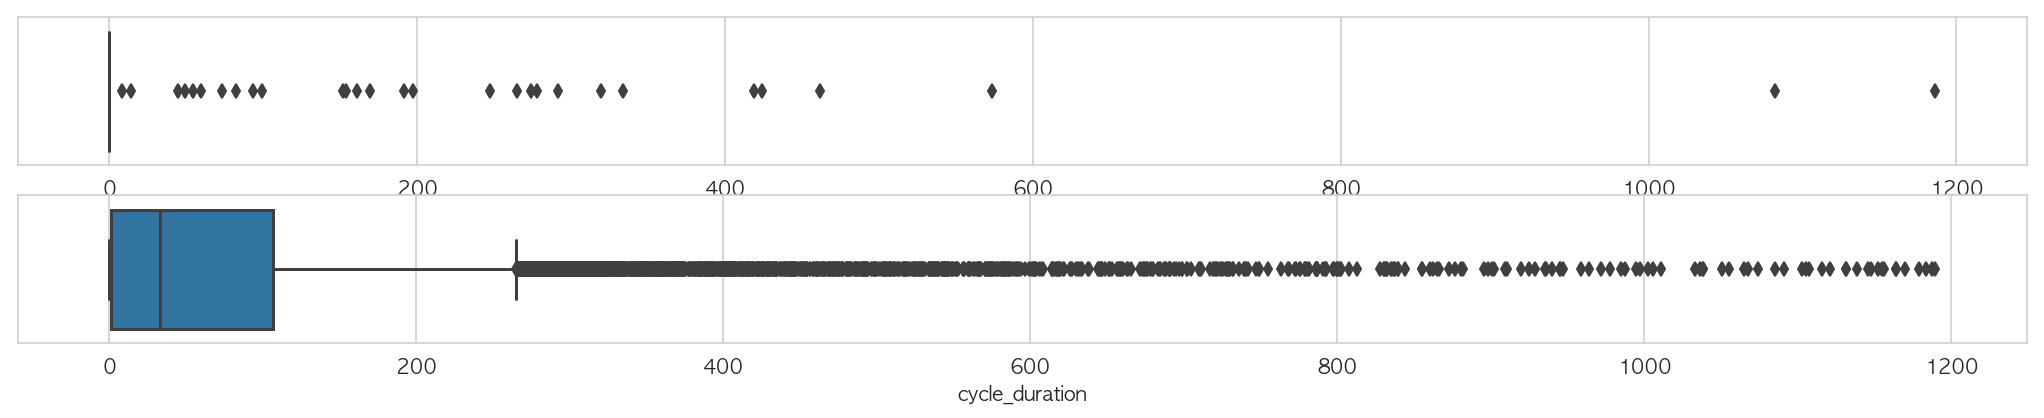

In [691]:
# Write your code here!
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,3)

sns.boxplot(data = npurchase_session_duration, x = "session_duration", ax = ax1)
sns.boxplot(data = purchase_session_duration, x = "session_duration", ax = ax2)

In [ ]:

purchase_session_mean = purchase_session_duration['session_duration'].mean()
npurchase_session_mean = npurchase_session_duration['session_duration'].mean()
print("구매 session 잔존 시간 평균:",purchase_session_mean)
print("비구매 session 잔존 시간 평균:",npurchase_session_mean)
